In [20]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# import data
df = pd.read_csv('processed.csv')

# drop unnecessary columns
df.drop(labels="index", axis=1, inplace=True)

# replace Y/N with 1/0
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})

df.head()

c:\Users\gabri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,semi-major_axis,perihelion_distance,aphelion_distance,orbital_period,data_arc-span,orbit_condition_code,number_observations,absolute_magnitude,diameter,albedo,neo,pha,moid
0,2.769165,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.4,0.0900,0,0,1.59478
1,2.772466,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545,0.1010,0,0,1.23324
2,2.669150,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,0,0,1.03454
3,2.361418,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.4,0.4228,0,0,1.13948
4,2.574249,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,0,0,1.09589


In [5]:
# type cast data
df = df.astype(float)

# normalize data
def min_max_scaling(column):
    return (column-column.min())/(column.max()-column.min())
for column in df.columns:
    if column != 'diameter':
        df[column]=min_max_scaling(df[column])

# shuffle dataframe
df = df.sample(frac = 1)

# split dataframe into train and test
split_index = int(df.shape[0] * 0.8)
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]

# split train and test into X and Y
Y_train = df_train['diameter']
Y_test = df_test['diameter']
X_train = df_train.drop(labels='diameter',axis=1)
X_test = df_test.drop(labels='diameter',axis=1)

In [32]:
model=MLPRegressor()
model.fit(X_train, Y_train)

c:\Users\gabri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [ ]:
mae = metrics.mean_absolute_error(Y_train, model.predict(X_train))
mse = metrics.mean_squared_error(Y_train, model.predict(X_train))
rsq = metrics.r2_score(Y_train, model.predict(X_train))
print(mae, mse, rsq)

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=400, max_features=5, max_depth=6)
rf_reg.fit(X_train, Y_train)
pred = rf_reg.predict(X_test)

print('Training Accuracy : ' , rf_reg.score(X_train, Y_train))
print('Test Accuracy : ' , rf_reg.score(X_test, Y_test))

Training Accuracy :  0.9532128170732963
Test Accuracy :  0.8610753188032934


In [33]:
mse = metrics.mean_squared_error(pred, Y_test)
print(mse)
print(pred)
print(pred[4])
print(pred.shape)
print(Y_test.shape)

16.07949087841794
[2.9310618  2.8277842  3.79621986 ... 4.41723005 3.07921161 3.86940488]
3.3557252244421427
(27209,)
(27209,)


15.356247662639333


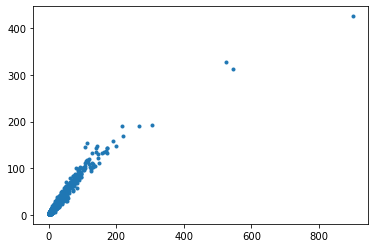

In [30]:
x = np.array(Y_test)
y = np.array(pred)
print(metrics.mean_squared_error(x, y))
plt.plot(x, y,linestyle='',marker='.')

plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

# training
lr.fit(X_train,Y_train)

# predicting
Y_prediction_lr=lr.predict(X_test)

# scoring
score_lr=r2_score(Y_test,Y_prediction_lr)
score_lr

0.37033881803644475